In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import pickle

sns.set_style('white')
%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.weight'] = 'bold'

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
df_rel_sort_list = pickle.load(open('pickle_files/rel_sort_lod_list.pkl', 'rb'))
df_abs_sort_list = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))

df_pseudo_rel_sort_list = pickle.load(open('pickle_files/pseudo_rel_sort_lod_list.pkl', 'rb'))
df_pseudo_abs_sort_list = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))

df_col_names_list = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
df_metadata = pickle.load(open('pickle_files/metadata_comp_aerobicity_disruptor.pkl', 'rb'))

### Calculate Alpha Diversity: Shannon Diversity, Observed OTUs, and Evenness

In [3]:
# Count the number of species with measured values for each sample
observed_ASV = df_abs_sort_list[5].astype(bool).sum(axis=1)

df_metadata['observed_ASV'] = observed_ASV

In [4]:
# Calculate Shannon Diversity
species_count = [0]*len(df_rel_sort_list[5])
shannon = [0]*len(df_rel_sort_list[5])
count=0
for index, row in df_rel_sort_list[5].iterrows():
    x = np.array(row.values)
    x_nonzero = x[x.nonzero()]/100
    
    species_count[count] = len(x_nonzero)
    shannon[count] = np.sum([val*np.log(val) for val in x_nonzero])
    count+=1

In [5]:
df_metadata['Shannon_Diversity'] = -1*np.array(shannon)
df_metadata['Evenness'] = df_metadata['Shannon_Diversity']/np.log(df_metadata['observed_ASV'])

### Scatterplot relating alpha diversity to anaerobic percent

Text(0.5, 0, 'Strict Anaerobe Percent')

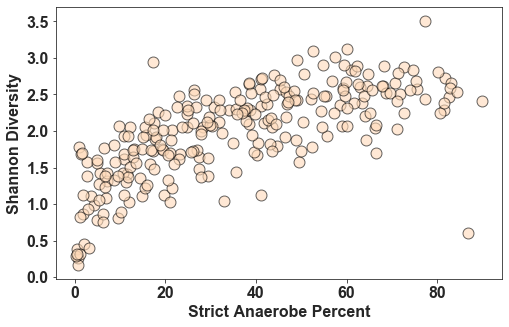

In [6]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

sns.scatterplot(ax=ax, x='anaerobic_percent', y='Shannon_Diversity', data=df_metadata, s=120, alpha=0.6, 
                edgecolor='k', linewidth=1, color='PeachPuff')

ax.set_ylabel('Shannon Diversity', fontsize=16, fontweight='bold')
ax.set_xlabel('Strict Anaerobe Percent', fontsize=16, fontweight='bold')

#fig.savefig('Shannon_v_Anaerobic.png', bbox_inches='tight', dpi=200)
#fig.savefig('Shannon_v_Anaerobic.pdf', bbox_inches='tight', transparent=True)

In [7]:
stats.pearsonr(df_metadata['Shannon_Diversity'], df_metadata['anaerobic_percent'])

(0.705930010763684, 5.068279770668529e-39)

In [8]:
df_metadata.to_pickle('pickle_files/metadata_all.pkl')